# Lab-based Group Assignment 4: 
## Prediction of Product Satisfaction by using Customer Reviews

![Imgur](https://i.imgur.com/4HJknC2.png)

## Business Problem
For clothing companies, it is very important to quantify customers' satisfaction on your products so that customer retention team could intervene with corresponding measures before the customers churn due to dissatisfaction (e.g. provide refund for customers who have very low satisfaction on your product, while only provide replacement for customers who have relatively low satisfaction).  
  
Such kind of quantification is very easy to do on e-commerce websites since customers who write reviews for products would also providing a rating for the product. However, for customers who shop offline and for those who discuss about the products through other online channels such as Twitter and blogs, such kind of quantification doesn't exist, which hinders the ability of a company to retain these customers.  
  
Therefore, it is crucial for a company to create a satisfaction rating prediction model based on customers' discussion.  

![Imgur](https://i.imgur.com/O1XLXaS.png)

Credit: Amazon Seller Center

Output will be the number of stars, the rating.


## Working with Text Data

![Imgur](https://i.imgur.com/CLfKQQP.png)

**Credit:** Chollet, Francois "Deep learning with Python (2017)."

one hot coding 

or

word embeding


## Representing Words

![Imgur](https://i.imgur.com/jeQLzxq.png)

We need to reduce the dimension from 5000 to a smaller number, like 300, denser.


## Task 
For this assignment, you are required to create a rating prediction model based on customers' reviews about women's clothing on an e-commerce platform.

# File Preparation:

Read the data into a dataframe. **Reviews with no rating and ratings with no review text should be excluded from the dataframe.**

TIPS:The columns you would use are the rating column and review text column

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/DL DAT 565E/Womens Clothing E-Commerce Reviews.csv",index_col=0)
df=df.loc[:,["Review Text","Rating"]].dropna().reset_index(drop=True)
# we only need "Review Text" column as our input column, and "Rating" column as our output column
# so we remove all other columns except for these two

After cleaning the data, you should have 22641 reviews available.

In [7]:
len(df)
# now we have 22641 customer reviews and 22641 ratings

22641

**QUESTION:** Let's look at the distribution of the rating, what do you find out? What should you do when splitting training and testing datasets in order to to mitigate potential issues?

In [9]:
df["Rating"].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

We have almost half of customers who rate the product 5 stars. But for the customers who gave 3, 2, or 1 star, our products are very likely to be returned, which may cause a loss to the company.

**Answer:**  
The distribution of the rating is uneven. Nearly 55% of the reviews have a 5-star rating. Therefore, in order to ensure each subgroup within the population receives proper representation within the sample, we need to do a stratified sampling.  

(Two other methods are to give more weights on less reprsented ratings or to give less weight on more represented ratings. This is an advanced sampling technique that is very useful when training on contingencies such as credit fraud)

Build a train dataset for model training and validation dataset for model assessment.  
90% of the data should be used to build the training subset, while 10% of the data should be used to build the validation subset.  
You should use review text as the predictor and rating as the outcome.  

We can try test size 0.1, 0.2, 0.3 for getting lower mape errors for training and validation results, and explain what we have after changing these parameters.

In [12]:
from sklearn.model_selection import train_test_split
rev=df["Review Text"]
target=df["Rating"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)

## 1. Provide a common-sense, non-machine learning baseline prediction
**TIPS:**  
**Treat rating as a continuous variable for this assignment.**  
Although technically, the rating is a categorical variable (you can only choose between 1,2,3,4, and 5). In this scenario, it is possible to treat it as a continuous variable when doing prediction.  
For example, a rating of 3.7 generated by the prediction model indicates that the customer has a satisfaction level of around 3-4, with an inclination towards 4.   

In [13]:
average_rating=y_test.mean()
mae=0
for rating in y_test:
  mae+=abs(rating-average_rating)
print(mae/len(y_test))

0.9041474789117512


**Answer:**  
Always predict that the rating is the average rating of the test dataset rating. In this case, the mean absolute percent error is about 0.9.  

(Other metrics include MSE, MAPE, etc)  

## Predict the rating using SimpleRNN and your own word embedding,

Rubric: Use Tokenizer (one-hot encoding was not recommended in 4.1), use embedding layer, use simpleRNN layer, dropout and stacking are optional

## Using pre-trained word embeddings

![Imgur](https://i.imgur.com/DLK2ywd.png)

Change the first vector to less numbers based on the weights.


![Imgur](https://i.imgur.com/LQUIc5o.png)

But then we will lose the sequence. We need to keep the sequence.


![Imgur](https://i.imgur.com/ZkHz0Rb.png)

Sequence preprocessing

pad_sequences


Q2

In [14]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000
# define the dimension, vocabulary list has 10000 words in it

maxlen = 20
# maximum sequence length
batch_size = 32

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# X_train with upper case "X" is tokenized, x_train with lower case "x" is not

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

20376 train sequences
2265 test sequences
Pad sequences (samples x text length)
X_train shape: (20376, 20)
X_test shape: (2265, 20)


We have 20376 reviews for training, 2265 for testing; we have 20 numbers for each review

In [15]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1323,5,893,275,4,2,330,475,5,70,226,17,21,2,26,546,2073,18,187,8142
1,20,8,57,3,71,5,95,98,4,50,78,150,1161,41,9,104,13,2493,95,636
2,3,29,1139,3,127,222,544,10,2,105,17,71,267,4,142,6,144,211,152,1681
3,85,190,2,64,14,8,26,7,17,68,4,202,2,819,26,2,399,7,68,36
4,3,65,9,23,80,993,15,128,113,35,145,518,62,4,2,360,7,5,62,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,16,24,69,11,16,24,495,2,26,46,407,18,2594,1420,4,112,31,49,52,274
20372,17,99,69,4,276,9,33,3,92,17,196,216,10,6,6,7,5,1184,13,220
20373,751,1135,18,843,378,2,83,7,1551,4,827,131,20,29,45,74,4,56,30,421
20374,3,53,2,47,2,26,40,782,148,14,31,778,6,42,25,166,168,15,60,98


## Fundamentals of Recurrent Neural Networks (RNNs)

Why we are not use Full Connected Networks
- Cannot learn the position of words in text

we need sequence
- Inputs and outputs can have different size, and it is too complex to use classic NNs

![Imgur](https://i.imgur.com/g7Jnn7o.png)

## Vanishing Gradients and Exploding Gradients Problems
RNN cannot capture long-range dependencies because we have deep layers 
- Exploding gradients - Gradient Clipping (Give threshold value and clip gradient vectors )

weights bacome large in later part
- Vanishing gradients - Long Short Term Memory (LSTM)

lost some weights in later part

![Imgur](https://i.imgur.com/4mAUXhg.png)

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
embedding_dim = 64
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 64)`.

model.add(SimpleRNN(32, return_sequences=True)) # sharing information
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(32)) # default activation is "tanh"
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 32)            3104      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 16)            784       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 645,489
Trainable params: 645,489
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 10s 25ms/step - loss: 0.9135 - mape: 38.7777 - val_loss: 0.8177 - val_mape: 38.3333
Epoch 2/10
256/256 [==============================] - 6s 23ms/step - loss: 0.8320 - mape: 38.5994 - val_loss: 0.8208 - val_mape: 36.7001
Epoch 3/10
256/256 [==============================] - 6s 23ms/step - loss: 0.6968 - mape: 29.5548 - val_loss: 0.6574 - val_mape: 27.6983
Epoch 4/10
256/256 [==============================] - 6s 23ms/step - loss: 0.6095 - mape: 25.1778 - val_loss: 0.6278 - val_mape: 27.2221
Epoch 5/10
256/256 [==============================] - 6s 23ms/step - loss: 0.5752 - mape: 23.3809 - val_loss: 0.5934 - val_mape: 24.0302
Epoch 6/10
256/256 [==============================] - 6s 24ms/step - loss: 0.4728 - mape: 19.5012 - val_loss: 0.6234 - val_mape: 24.2487
Epoch 7/10
256/256 [==============================] - 6s 23ms/step - loss: 0.4687 - mape: 18.5478 - val_loss: 0.6115 - val_mape: 24.5375
Epoch 8/10
256/256 [====================

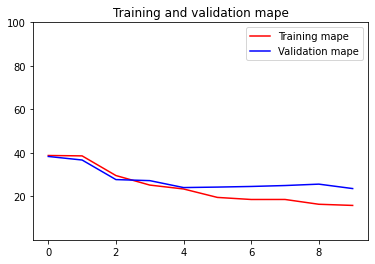

In [18]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()
# we have underfitting and overfitting problems at the same time

## Predict using Conv1D with word embedding.

Rubric: Use Tokenizer, use GLove enbedding, use Conv1D, dropout and stacking are optional

In [20]:
from keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             10272     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [21]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                   validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 4s 14ms/step - loss: 0.9909 - mape: 34.2087 - val_loss: 0.7200 - val_mape: 29.4968
Epoch 2/10
256/256 [==============================] - 4s 14ms/step - loss: 0.7244 - mape: 29.0595 - val_loss: 0.6903 - val_mape: 27.3071
Epoch 3/10
256/256 [==============================] - 4s 14ms/step - loss: 0.6523 - mape: 25.3849 - val_loss: 0.6629 - val_mape: 25.2939
Epoch 4/10
256/256 [==============================] - 4s 14ms/step - loss: 0.5891 - mape: 23.0996 - val_loss: 0.6629 - val_mape: 25.8978
Epoch 5/10
256/256 [==============================] - 3s 13ms/step - loss: 0.5967 - mape: 23.5679 - val_loss: 0.6646 - val_mape: 26.7634
Epoch 6/10
256/256 [==============================] - 3s 13ms/step - loss: 0.5070 - mape: 19.8877 - val_loss: 0.6694 - val_mape: 25.2224
Epoch 7/10
256/256 [==============================] - 4s 14ms/step - loss: 0.5061 - mape: 19.6314 - val_loss: 0.6707 - val_mape: 26.0402
Epoch 8/10
256/256 [=====================

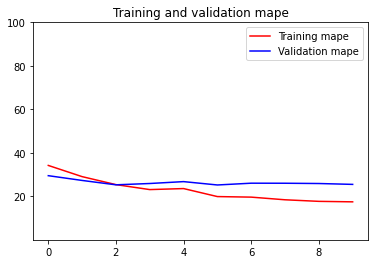

In [22]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

## Reqularization with LSTM

In [23]:
model = Sequential()
#model.add(layers.Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 12s 36ms/step - loss: 1.1278 - mape: 42.6965 - val_loss: 0.8063 - val_mape: 35.6375
Epoch 2/10
256/256 [==============================] - 9s 36ms/step - loss: 0.7411 - mape: 30.6461 - val_loss: 0.6714 - val_mape: 28.9288
Epoch 3/10
256/256 [==============================] - 9s 35ms/step - loss: 0.6283 - mape: 25.0958 - val_loss: 0.6184 - val_mape: 25.4585
Epoch 4/10
256/256 [==============================] - 9s 35ms/step - loss: 0.5911 - mape: 23.6318 - val_loss: 0.6179 - val_mape: 26.1990
Epoch 5/10
256/256 [==============================] - 9s 35ms/step - loss: 0.5864 - mape: 23.6739 - val_loss: 0.5949 - val_mape: 24.0135
Epoch 6/10
256/256 [==============================] - 9s 35ms/step - loss: 0.5200 - mape: 20.6345 - val_loss: 0.5910 - val_mape: 22.7637
Epoch 7/10
256/256 [==============================] - 9s 34ms/step - loss: 0.5281 - mape: 21.2236 - val_loss: 0.5949 - val_mape: 24.7841
Epoch 8/10
256/256 [====================

We fixed overfitting problem a little bit (bcz LSTM), but there still exist underfitting problem.

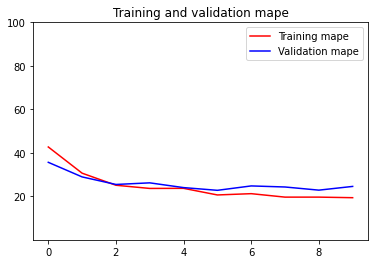

In [25]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

## Regularization with CNN and LSTM   
**Instructions:**  You are required to use dropout when building prediction model in this question.  

In [26]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 672,993
Trainable params: 672,993
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/10
256/256 [==============================] - 13s 37ms/step - loss: 1.0316 - mape: 37.1671 - val_loss: 0.6866 - val_mape: 28.4402
Epoch 2/10
256/256 [==============================] - 9s 35ms/step - loss: 0.6701 - mape: 27.1837 - val_loss: 0.6275 - val_mape: 26.4784
Epoch 3/10
256/256 [==============================] - 9s 35ms/step - loss: 0.5869 - mape: 24.1271 - val_loss: 0.6117 - val_mape: 23.8911
Epoch 4/10
256/256 [==============================] - 9s 35ms/step - loss: 0.5497 - mape: 21.9519 - val_loss: 0.6053 - val_mape: 23.9044
Epoch 5/10
256/256 [==============================] - 9s 36ms/step - loss: 0.5555 - mape: 22.4283 - val_loss: 0.5880 - val_mape: 23.4119
Epoch 6/10
256/256 [==============================] - 9s 35ms/step - loss: 0.4937 - mape: 19.9739 - val_loss: 0.5861 - val_mape: 22.8813
Epoch 7/10
256/256 [==============================] - 9s 35ms/step - loss: 0.4925 - mape: 19.6536 - val_loss: 0.5932 - val_mape: 22.5778
Epoch 8/10
256/256 [====================

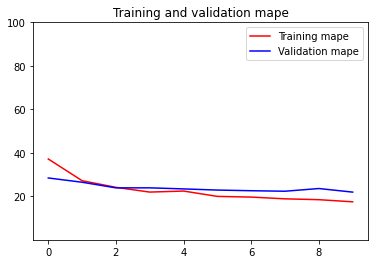

In [28]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

Now we use Bidirectional model

In [29]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.Bidirectional(
    layers.LSTM(64,dropout=0.2,recurrent_dropout=0.2)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            640000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            20544     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 726,721
Trainable params: 726,721
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train,
                    epochs=10,
                    steps_per_epoch = 256,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))
keras.backend.clear_session()

Epoch 1/10
256/256 [==============================] - 23s 68ms/step - loss: 0.9275 - mape: 33.7244 - val_loss: 0.6752 - val_mape: 27.6002
Epoch 2/10
256/256 [==============================] - 17s 66ms/step - loss: 0.6550 - mape: 26.3104 - val_loss: 0.6521 - val_mape: 27.5920
Epoch 3/10
256/256 [==============================] - 17s 66ms/step - loss: 0.5812 - mape: 23.9771 - val_loss: 0.6046 - val_mape: 23.8664
Epoch 4/10
256/256 [==============================] - 17s 66ms/step - loss: 0.5472 - mape: 22.0690 - val_loss: 0.5976 - val_mape: 22.9360
Epoch 5/10
256/256 [==============================] - 17s 65ms/step - loss: 0.5604 - mape: 22.3542 - val_loss: 0.5905 - val_mape: 24.3522
Epoch 6/10
256/256 [==============================] - 17s 66ms/step - loss: 0.4757 - mape: 19.1104 - val_loss: 0.5985 - val_mape: 24.3737
Epoch 7/10
256/256 [==============================] - 17s 65ms/step - loss: 0.5087 - mape: 20.2208 - val_loss: 0.6015 - val_mape: 25.2685
Epoch 8/10
256/256 [==============

These still exist underfitting problem, but overfitting problem has been solved. (In class)

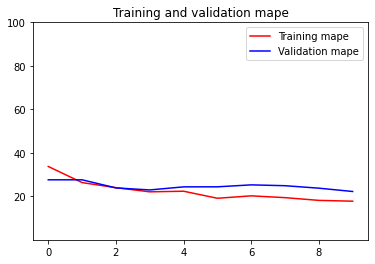

In [31]:
import matplotlib.pyplot as plt

mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, mape, 'r', label='Training mape')
plt.plot(epochs, val_mape, 'b', label='Validation mape')
plt.title('Training and validation mape')
plt.legend()
plt.ylim(ymax=100,ymin=0.01)

plt.show()

In [32]:
model.save('/content/modelrating.h5')